In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy.stats  import boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
data = df.copy()

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

[]

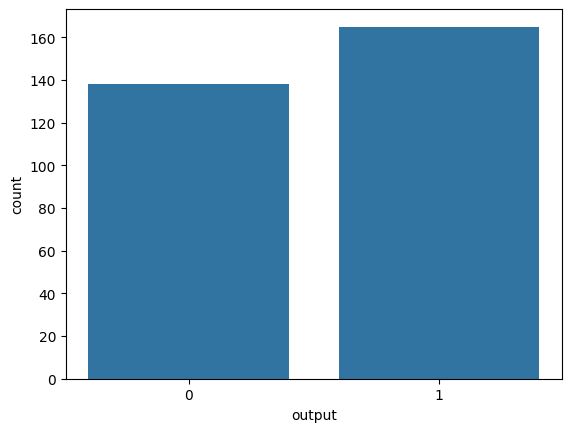

In [6]:
# data['output'].value_counts().plot(kind='bar')
sns.countplot(x='output',data=data)
plt.plot()

In [7]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
data = data.drop_duplicates()

In [9]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

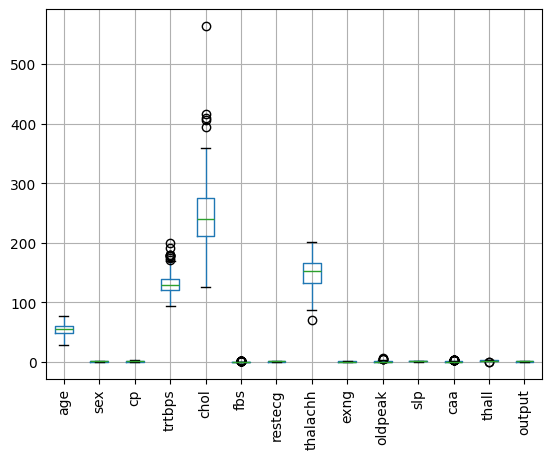

In [13]:
data.boxplot(rot=90)


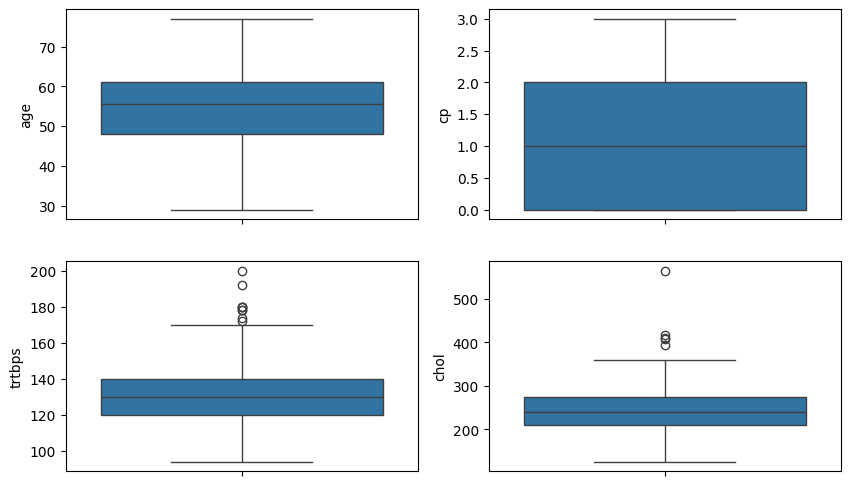

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(data['age'])

plt.subplot(2,2,2)
sns.boxplot(data['cp'])

plt.subplot(2,2,3)
sns.boxplot(data['trtbps'])

plt.subplot(2,2,4)
sns.boxplot(data['chol'])
plt.show()

In [15]:
ls = data['trtbps'][data['trtbps']>data['trtbps'].quantile(0.97)]
ls

8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trtbps, dtype: int64

In [16]:
dummy = data['trtbps']

In [17]:
ls1 = list(map(lambda x : int(dummy.mean()) if x>170 else x,dummy))

In [18]:
data['trtbps'] = ls1

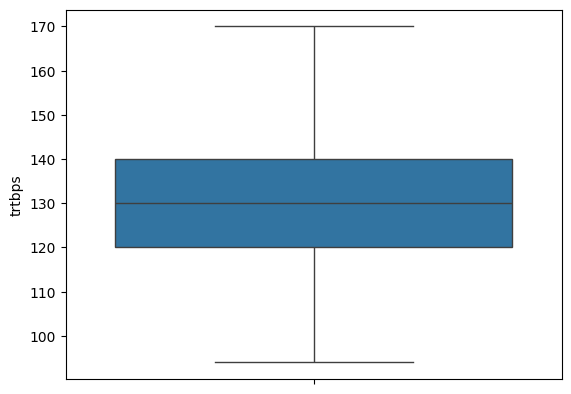

In [19]:
sns.boxplot(data['trtbps'])
plt.show()

In [20]:
 data['chol'][data['chol']> data['chol'].quantile(0.98)]


4      354
28     417
39     360
85     564
96     394
220    407
246    409
Name: chol, dtype: int64

In [21]:
dummy2 = data['chol']

In [22]:
ls2 = list(map(lambda x : int(dummy2.mean()) if x> 360 else x, dummy2))

In [23]:
data['chol']=ls2

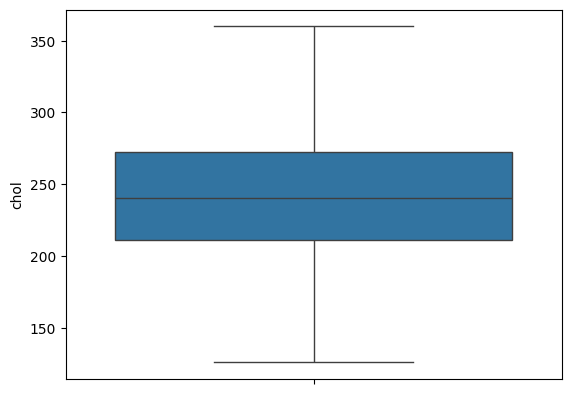

In [24]:
sns.boxplot(data['chol'])
plt.show()

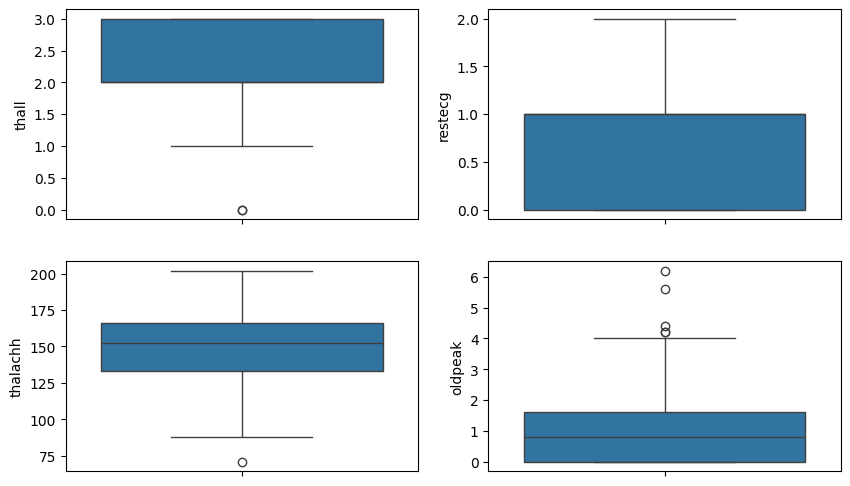

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(data['thall'])

plt.subplot(2,2,2)
sns.boxplot(data['restecg'])

plt.subplot(2,2,3)
sns.boxplot(data['thalachh'])

plt.subplot(2,2,4)
sns.boxplot(data['oldpeak'])
plt.show()

In [26]:
dummy3 = data['thall']

In [27]:
ls3 = list(map(lambda x: dummy3.mean() if x==0 else x , dummy3))

In [28]:
data['thall'] = ls3

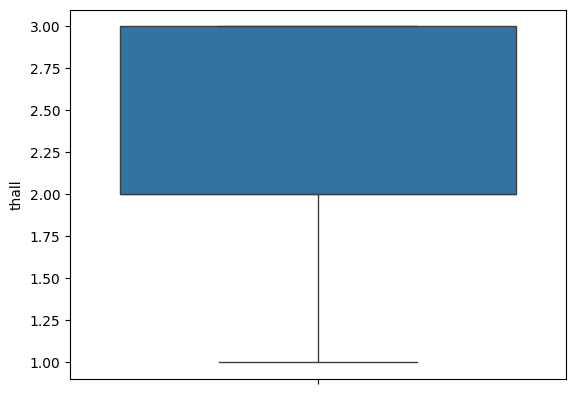

In [29]:
sns.boxplot(data['thall'])
plt.show()

In [30]:
data['thalachh'][data['thalachh']< data['thalachh'].quantile(0.01)]

243    88
262    95
272    71
297    90
Name: thalachh, dtype: int64

In [31]:
data = data[data['thalachh']!=71]

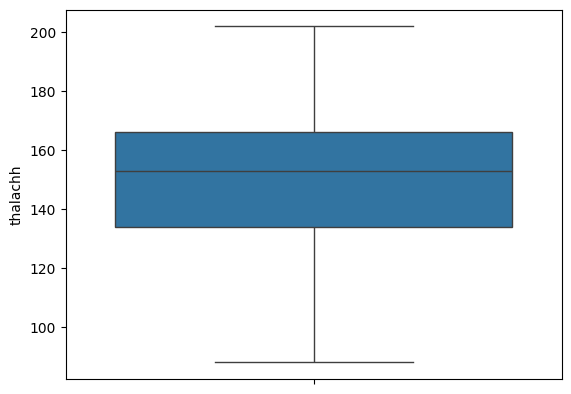

In [32]:
sns.boxplot(data['thalachh'])
plt.show()

In [33]:
data['oldpeak'][data['oldpeak']> data['oldpeak'].quantile(0.98)]

101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64

In [34]:
data= data[~data['oldpeak'].isin([4.2,6.2,5.6,4.4])]

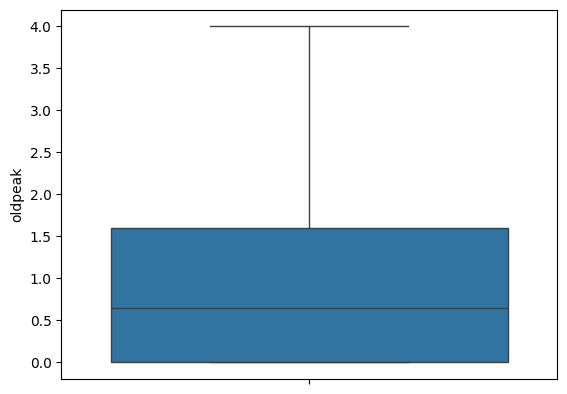

In [35]:
sns.boxplot(data['oldpeak'])
plt.show()

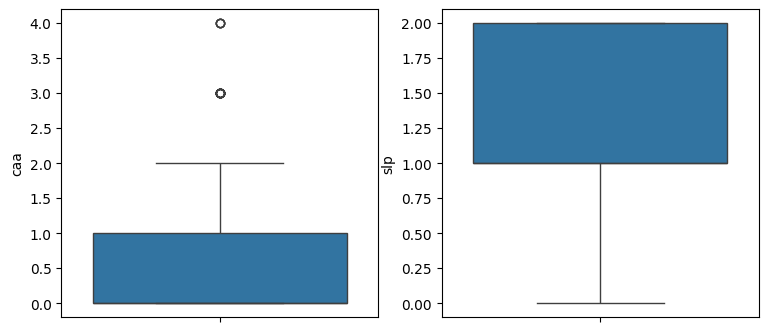

In [36]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(data['caa'])

plt.subplot(1,2,2)
sns.boxplot(data['slp'])

plt.show()

In [37]:
data['slp'].value_counts()

slp
2    141
1    138
0     17
Name: count, dtype: int64

In [38]:
data['caa'].value_counts()

caa
0    172
1     65
2     38
3     17
4      4
Name: count, dtype: int64

In [39]:
data = data[~data['caa'].isin([3,4])]

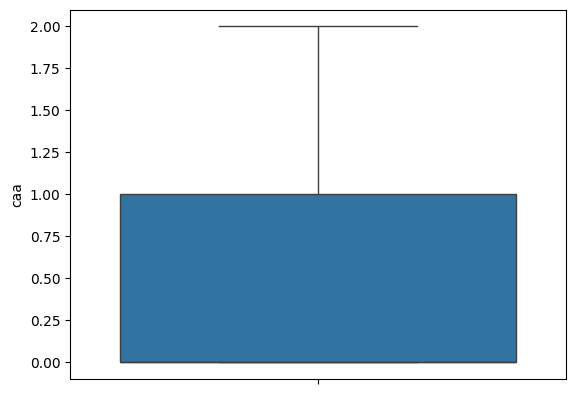

In [40]:
sns.boxplot(data['caa'])
plt.show()

In [42]:
data.sample(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2.0,1
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3.0,0


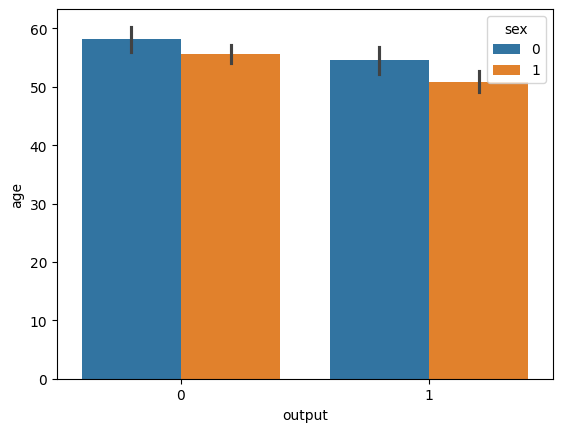

In [44]:
sns.barplot(x='output', y='age', hue='sex', data=data)
plt.show()

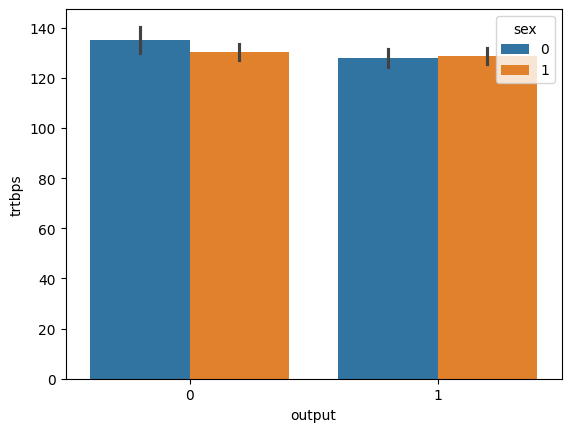

In [49]:
sns.barplot(x='output', y='trtbps', hue='sex', data=data)
plt.show()

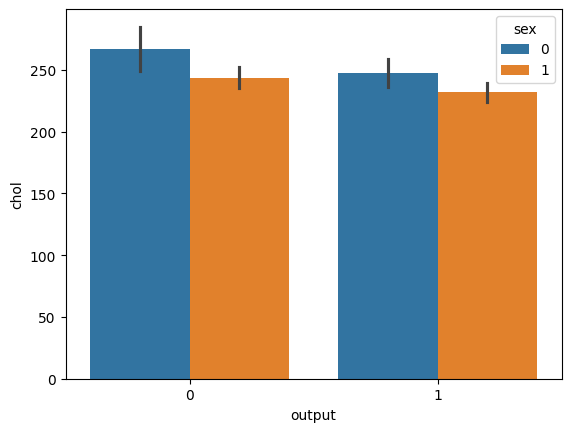

In [48]:
sns.barplot(x='output', y='chol', hue='sex', data=data)
plt.show()

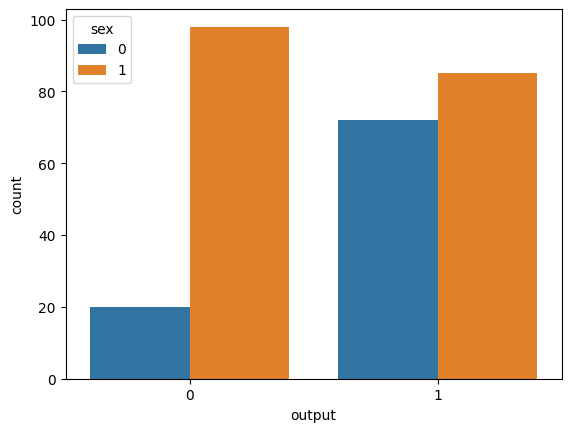

In [41]:

sns.countplot(x='output',data=data,hue='sex')
plt.show()

<Axes: xlabel='thall', ylabel='count'>

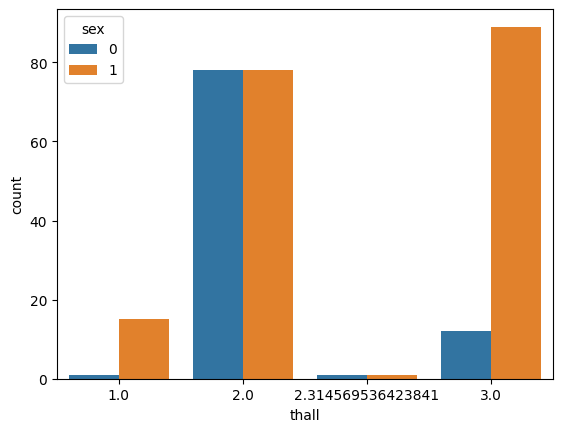

In [42]:
sns.countplot(x='thall',data=data,hue='sex')

In [43]:
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1


TRANSFORMATION

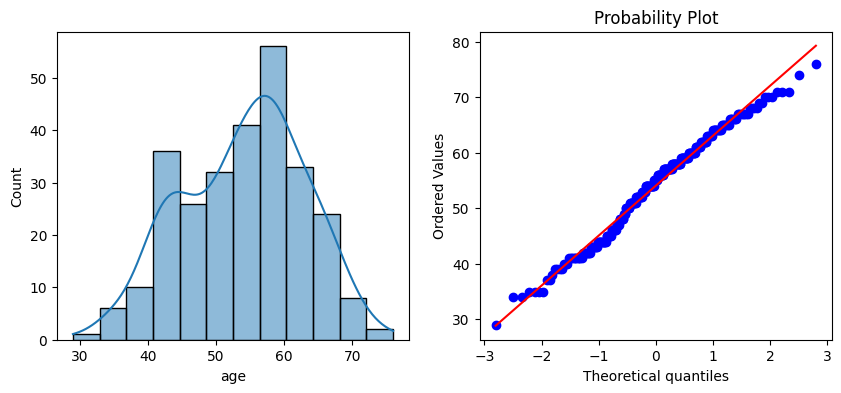

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data['age'],kde=True)

plt.subplot(1,2,2)
stat.probplot(data['age'], dist='norm',plot=plt)
plt.show()

In [45]:
data['cp'].value_counts()

cp
0    126
2     79
1     48
3     22
Name: count, dtype: int64

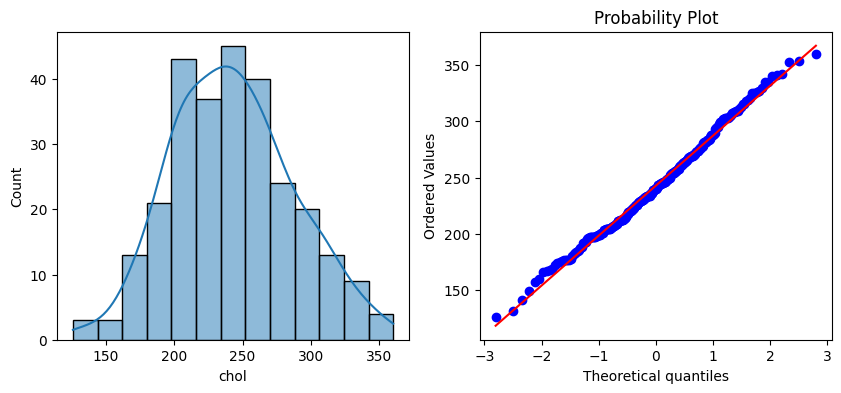

In [46]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data['chol'],kde=True)

plt.subplot(1,2,2)
stat.probplot(data['chol'], dist='norm',plot=plt)
plt.show()

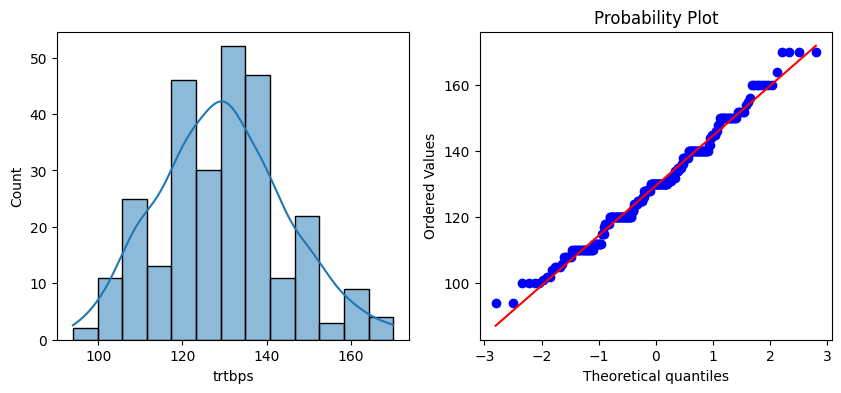

In [47]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data['trtbps'],kde=True)

plt.subplot(1,2,2)
stat.probplot(data['trtbps'], dist='norm',plot=plt)
plt.show()

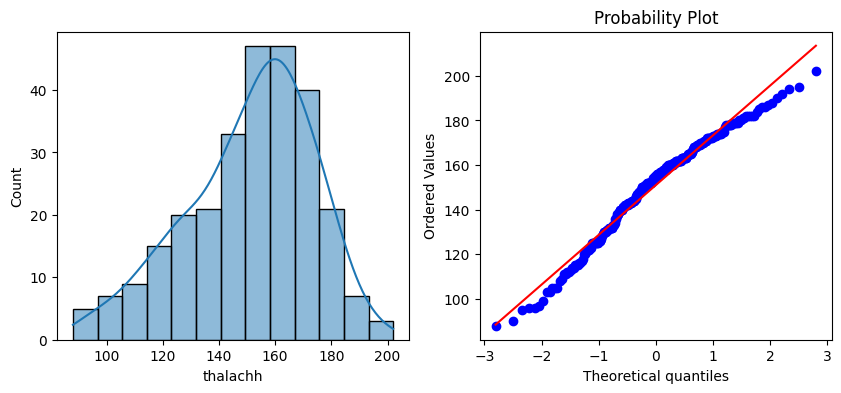

In [48]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data['thalachh'],kde=True)

plt.subplot(1,2,2)
stat.probplot(data['thalachh'], dist='norm',plot=plt)
plt.show()

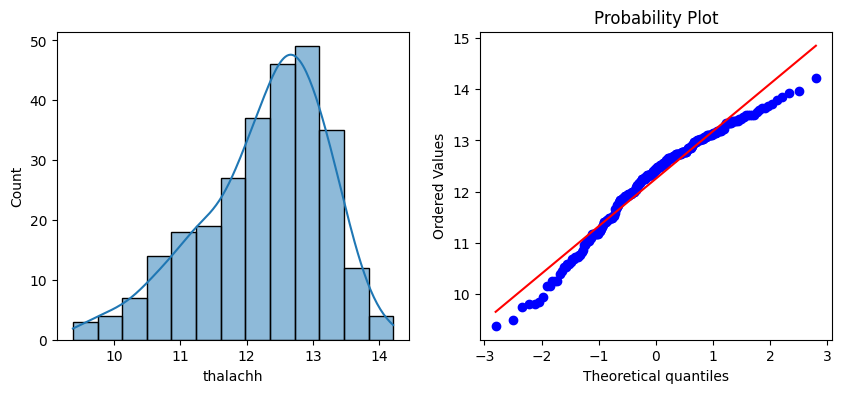

In [49]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(np.sqrt(data['thalachh']),kde=True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(data['thalachh']), dist='norm',plot=plt)
plt.show()

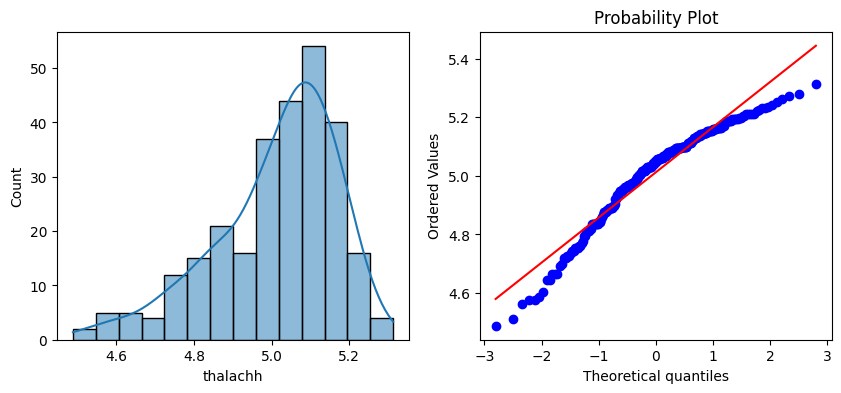

In [50]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(np.log1p(data['thalachh']),kde=True)

plt.subplot(1,2,2)
stat.probplot(np.log1p(data['thalachh']), dist='norm',plot=plt)
plt.show()

In [51]:
thalach , l = boxcox(data['thalachh'])

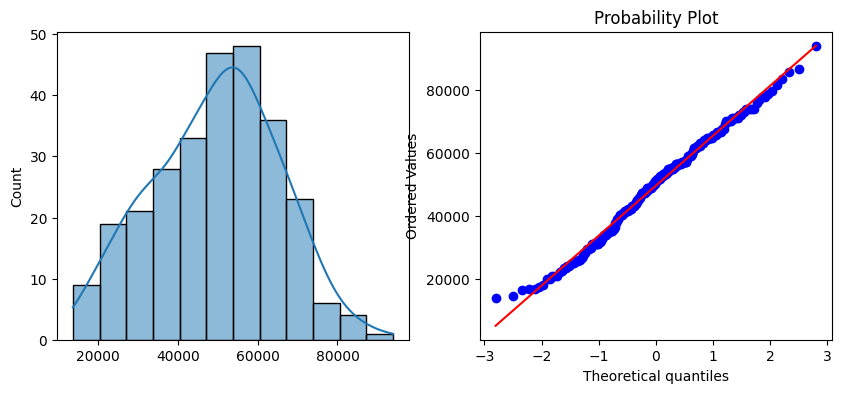

In [52]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(thalach,kde=True)

plt.subplot(1,2,2)
stat.probplot(thalach, dist='norm',plot=plt)
plt.show()

In [53]:
data['thalach'] = thalach

In [54]:
data.drop('thalachh',axis=1,inplace=True)

In [55]:
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,exng,oldpeak,slp,caa,thall,output,thalach
0,63,1,3,145,233,1,0,0,2.3,0,0,1.0,1,47162.902201
1,37,1,2,130,250,0,1,0,3.5,0,0,2.0,1,78575.733886


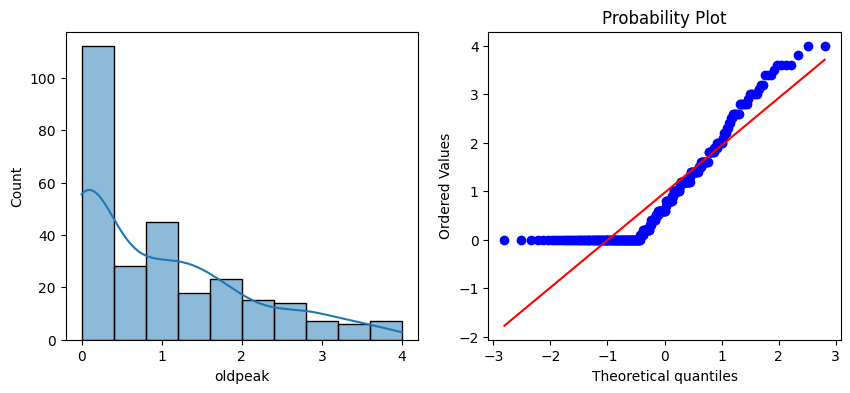

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data['oldpeak'],kde=True)

plt.subplot(1,2,2)
stat.probplot(data['oldpeak'], dist='norm',plot=plt)
plt.show()

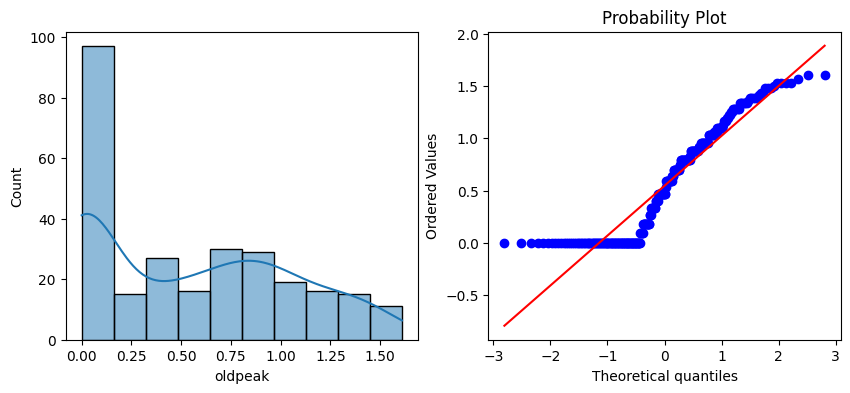

In [57]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(np.log1p(data['oldpeak']),kde=True)

plt.subplot(1,2,2)
stat.probplot(np.log1p(data['oldpeak']), dist='norm',plot=plt)
plt.show()

In [58]:
from scipy.stats import yeojohnson
transform_data, lambda_value = yeojohnson(data['oldpeak'])

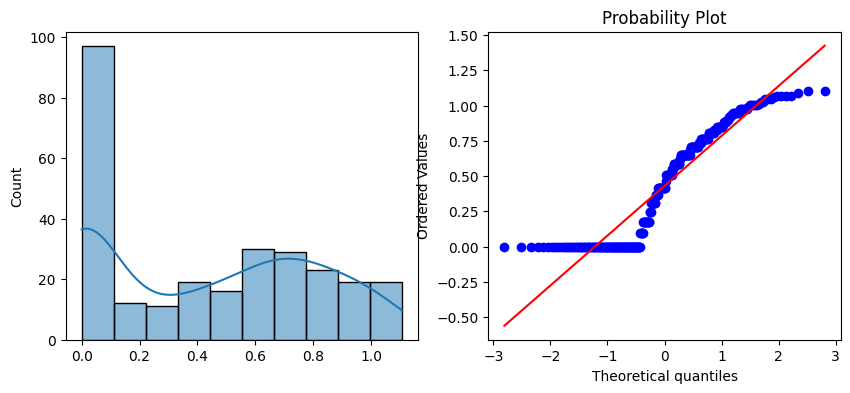

In [59]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(transform_data,kde=True)

plt.subplot(1,2,2)
stat.probplot(transform_data, dist='norm',plot=plt)
plt.show()

In [60]:
data['oldpeak'].corr(data['output'])

-0.43789483489762876

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      275 non-null    int64  
 1   sex      275 non-null    int64  
 2   cp       275 non-null    int64  
 3   trtbps   275 non-null    int64  
 4   chol     275 non-null    int64  
 5   fbs      275 non-null    int64  
 6   restecg  275 non-null    int64  
 7   exng     275 non-null    int64  
 8   oldpeak  275 non-null    float64
 9   slp      275 non-null    int64  
 10  caa      275 non-null    int64  
 11  thall    275 non-null    float64
 12  output   275 non-null    int64  
 13  thalach  275 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 32.2 KB


In [62]:
data.reset_index(drop=True,inplace=True)

In [63]:
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,exng,oldpeak,slp,caa,thall,output,thalach
0,63,1,3,145,233,1,0,0,2.3,0,0,1.0,1,47162.902201
1,37,1,2,130,250,0,1,0,3.5,0,0,2.0,1,78575.733886
2,41,0,1,130,204,0,0,0,1.4,2,0,2.0,1,64746.122332


SCALING

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
x = data.drop('output',axis=1)

In [66]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,exng,oldpeak,slp,caa,thall,thalach
0,63,1,3,145,233,1,0,0,2.3,0,0,1.0,47162.902201
1,37,1,2,130,250,0,1,0,3.5,0,0,2.0,78575.733886
2,41,0,1,130,204,0,0,0,1.4,2,0,2.0,64746.122332
3,56,1,1,120,236,0,1,0,0.8,2,0,2.0,70095.753959
4,57,0,0,120,354,0,1,1,0.6,2,0,2.0,57170.686946
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,57,0,0,140,241,0,1,1,0.2,1,0,3.0,29788.965126
271,45,1,3,110,264,0,1,0,1.2,1,0,3.0,35080.232278
272,68,1,0,144,193,1,1,0,3.4,1,2,3.0,40868.065078
273,57,1,0,130,131,0,1,1,1.2,1,1,3.0,25493.655707


In [67]:
y = data['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
270    0
271    0
272    0
273    0
274    0
Name: output, Length: 275, dtype: int64

In [68]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.23,random_state=99)

In [69]:
scaler = StandardScaler()

In [70]:
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

MODELS PERFORMING

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [72]:
lr = LogisticRegression()

In [73]:
lr.fit(x_train_s,y_train)

LogisticRegression()

In [74]:
lr.score(x_train_s,y_train)

0.8862559241706162

In [75]:
y_pred = lr.predict(x_test_s)

In [76]:
accuracy_score(y_pred,y_test)

0.875

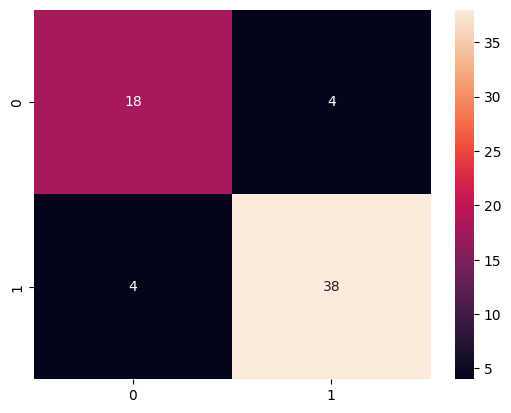

In [77]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt.show()

In [78]:
# classification_report(y_pred,y_test,labels=[1,2,3])
print(classification_report(y_pred,y_test, labels=[1, 2, 3]))
#print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        42
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.90      0.90      0.90        42
   macro avg       0.30      0.30      0.30        42
weighted avg       0.90      0.90      0.90        42



In [79]:
params = {'C':[0.001,0.01,0.1,1,10,20,50,100], 'penalty':['l1','l2']}

In [80]:
gscv = GridSearchCV(lr,params,cv=5,scoring='accuracy')

In [81]:
gscv.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [82]:
gscv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [83]:
gscv.score(x_train_s,y_train)

0.8672985781990521

In [84]:
y_p = gscv.predict(x_test_s)

In [85]:
accuracy_score(y_p,y_test)

0.875

RANDOM  FOREST

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier()

In [88]:
rfc.fit(x_train_s,y_train)

RandomForestClassifier()

In [89]:
rfc.score(x_train_s,y_train)

1.0

In [90]:
y_pred2 = rfc.predict(x_test_s)

In [91]:
accuracy_score(y_pred2,y_test)

0.875

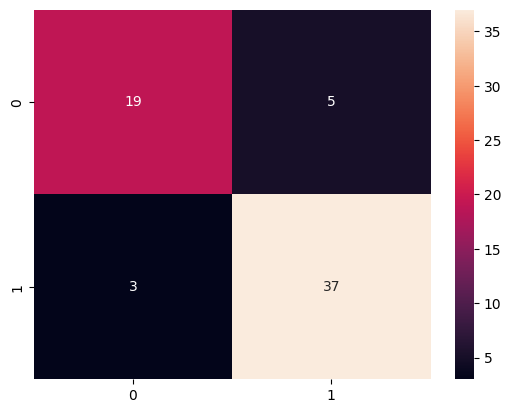

In [92]:
sns.heatmap(confusion_matrix(y_pred2,y_test),annot=True)
plt.show()

In [93]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.88      0.93      0.90        40

    accuracy                           0.88        64
   macro avg       0.87      0.86      0.86        64
weighted avg       0.87      0.88      0.87        64



In [94]:
param_grid = {'n_estimators':[20,60,100,120,200],'max_features':[0.2,0.6,1.0],'max_depth':[2,8,None],'max_samples':[0.5,0.75,1.0]}


In [95]:
rfgcv = GridSearchCV(rfc,param_grid,cv=5)

In [96]:
rfgcv.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120, 200]})

In [97]:
rfgcv.best_params_

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.75, 'n_estimators': 20}

In [98]:
rfgcv.best_score_

0.8481727574750829

In [99]:
y_p1 = rfgcv.predict(x_test_s)

In [100]:
accuracy_score(y_p1,y_test)

0.859375

SUPPORT VECTOR MACHINE

In [101]:
from sklearn.svm import SVC

In [102]:
svm = SVC()

In [103]:
svm.fit(x_train_s,y_train)

SVC()

In [104]:
svm.score(x_train_s,y_train)

0.9241706161137441

In [105]:
y_pred3 = svm.predict(x_test_s)

In [106]:
accuracy_score(y_pred3,y_test)

0.890625

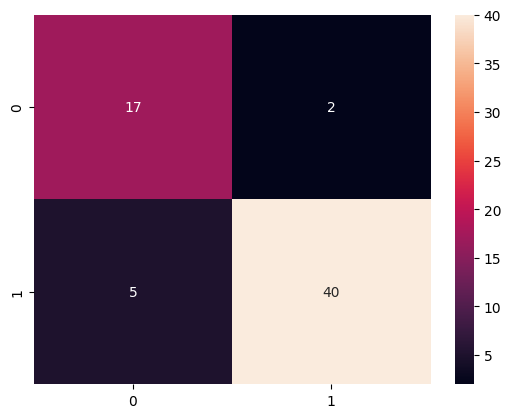

In [107]:
sns.heatmap(confusion_matrix(y_pred3,y_test),annot=True)
plt.show()

In [108]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.95      0.89      0.92        45

    accuracy                           0.89        64
   macro avg       0.86      0.89      0.87        64
weighted avg       0.90      0.89      0.89        64



K NEAREST NEIGHBOURS

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier()

In [111]:
knn.fit(x_train_s,y_train)

KNeighborsClassifier()

In [112]:
knn.score(x_train_s,y_train)

0.8720379146919431

In [113]:
y_pred4 = knn.predict(x_test_s)

In [114]:
accuracy_score(y_pred4,y_test)

0.875

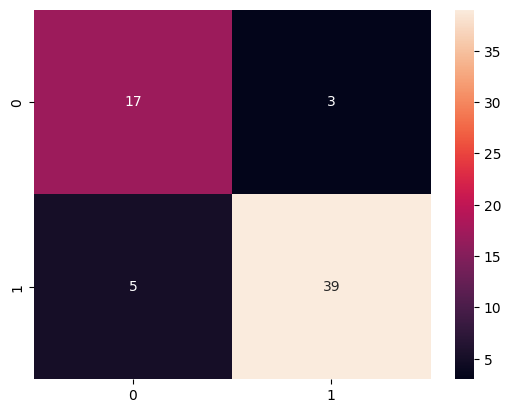

In [115]:
sns.heatmap(confusion_matrix(y_pred4,y_test),annot=True)
plt.show()

In [116]:
print(classification_report(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.93      0.89      0.91        44

    accuracy                           0.88        64
   macro avg       0.85      0.87      0.86        64
weighted avg       0.88      0.88      0.88        64



PCA

In [117]:
from sklearn.decomposition import PCA

In [118]:
transform = data.drop("output", axis=1)

In [119]:
transform

,age,sex,cp,trtbps,chol,fbs,restecg,exng,oldpeak,slp,caa,thall,thalach
0,63,1,3,145,233,1,0,0,2.3,0,0,1.0,47162.902201
1,37,1,2,130,250,0,1,0,3.5,0,0,2.0,78575.733886
2,41,0,1,130,204,0,0,0,1.4,2,0,2.0,64746.122332
3,56,1,1,120,236,0,1,0,0.8,2,0,2.0,70095.753959
4,57,0,0,120,354,0,1,1,0.6,2,0,2.0,57170.686946
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,57,0,0,140,241,0,1,1,0.2,1,0,3.0,29788.965126
271,45,1,3,110,264,0,1,0,1.2,1,0,3.0,35080.232278
272,68,1,0,144,193,1,1,0,3.4,1,2,3.0,40868.065078
273,57,1,0,130,131,0,1,1,1.2,1,1,3.0,25493.655707


In [120]:
transform_s = scaler.fit_transform(transform)

In [121]:
pca = PCA(n_components=2)

In [122]:
new_df = pca.fit_transform(transform_s)

In [123]:
new_df

array([[ 7.17175569e-01,  3.09294923e+00],
       [-4.17192062e-01, -7.90807464e-01],
       [-1.75160068e+00, -9.15462500e-02],
       [-1.65937473e+00, -5.19038484e-01],
       [-3.05744283e-01, -2.13305942e-01],
       [-5.95814411e-01,  4.52785114e-02],
       [-6.54798002e-02,  1.37107161e+00],
       [-1.84081361e+00, -1.44395581e+00],
       [-1.17315086e+00,  3.06471873e-01],
       [-1.34362130e+00,  4.70521255e-01],
       [-7.45689118e-01, -3.38803588e-01],
       [-1.70481991e+00,  5.29804456e-01],
       [-1.68948923e+00, -4.09537171e-01],
       [ 7.82391820e-01, -5.67376571e-02],
       [-1.12885937e+00,  3.42639846e+00],
       [-1.00825827e+00,  2.28402607e-02],
       [-2.09189791e+00,  1.03795164e+00],
       [ 1.26271841e+00,  2.08423942e+00],
       [-1.15328123e+00, -5.31506150e-01],
       [ 5.67525756e-02,  2.44153806e+00],
       [ 5.24433901e-02, -7.48053998e-01],
       [-1.59602925e+00, -1.03060666e+00],
       [-2.06709644e+00, -9.71366101e-01],
       [ 1.

In [124]:
x1 = new_df
y1 = data['output']

In [125]:
x_tr1,x_te1,y_tr1,y_te1 = train_test_split(x1,y1,train_size=0.78,random_state=36)

In [126]:
rfc1 = RandomForestClassifier()

In [127]:
rfc1.fit(x_tr1,y_tr1)

RandomForestClassifier()

In [128]:
rfc1.score(x_tr1,y_tr1)

1.0

In [129]:
y_pp = rfc1.predict(x_te1)

In [130]:
accuracy_score(y_pp,y_te1)

0.8032786885245902

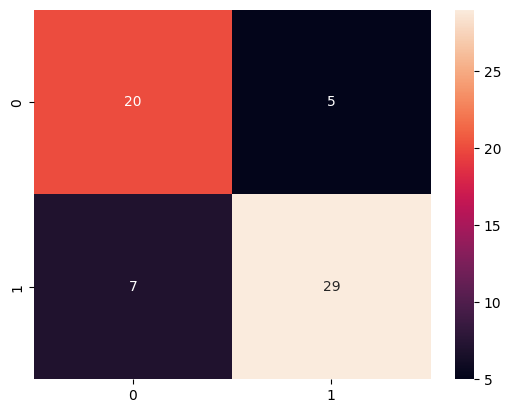

In [131]:
sns.heatmap(confusion_matrix(y_pp,y_te1),annot=True)
plt.show()

In [132]:
print(classification_report(y_pp,y_te1))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [133]:
from sklearn.ensemble import StackingClassifier

In [134]:
estimators = [
('rf', RandomForestClassifier()),
('knn', KNeighborsClassifier(n_neighbors=10)),
('lr', LogisticRegression())
]

In [135]:
clf = StackingClassifier(estimators=estimators,final_estimator=SVC(),
                        cv=10)

In [136]:
clf.fit(x_train_s,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier()),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('lr', LogisticRegression())],
                   final_estimator=SVC())

In [137]:
clf.score(x_train_s,y_train)

0.9052132701421801

In [138]:
y_pre5 = clf.predict(x_test_s)

In [139]:
accuracy_score(y_pre5,y_test)

0.890625

In [140]:
score = []
for i in range(100):
    x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.23,random_state=i)
    clf = StackingClassifier(estimators=estimators,final_estimator=SVC(),
                        cv=10)
    clf.fit(x_train_s,y_train)
    y_pre6 = clf.predict(x_test_s)
    score.append(accuracy_score(y_pre6,y_test))

In [142]:
np.argmax(score)

99

In [141]:
score[np.argmax(score)]

0.890625